In [1]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.sys.path.append('../')

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
hep.style.use('CMS')

# Discover the new file

In [133]:
!ls -lh /mnt/storage/lborgna/track/l1_nnt/OldKF_TTbar_170K_quality.root

-rw-r--r-- 1 lborgna users 4.9G Nov 24 17:09 /mnt/storage/lborgna/track/l1_nnt/OldKF_TTbar_170K_quality.root


In [4]:
import uproot

In [5]:
f = uproot.open('/mnt/storage/lborgna/track/l1_nnt/OldKF_TTbar_170K_quality.root')

In [6]:
f.keys()

['L1TrackNtuple;1', 'L1TrackNtuple/eventTree;1']

In [7]:
t = f['L1TrackNtuple/eventTree;1']

In [8]:
t.keys()

['trk_pt',
 'trk_eta',
 'trk_phi',
 'trk_d0',
 'trk_z0',
 'trk_chi2',
 'trk_chi2dof',
 'trk_chi2rphi',
 'trk_chi2rz',
 'trk_bendchi2',
 'trk_nstub',
 'trk_lhits',
 'trk_dhits',
 'trk_seed',
 'trk_hitpattern',
 'trk_phiSector',
 'trk_genuine',
 'trk_loose',
 'trk_unknown',
 'trk_combinatoric',
 'trk_fake',
 'trk_MVA1',
 'trk_MVA2',
 'trk_matchtp_pdgid',
 'trk_matchtp_pt',
 'trk_matchtp_eta',
 'trk_matchtp_phi',
 'trk_matchtp_z0',
 'trk_matchtp_dxy',
 'KFtrk_inv2R',
 'KFtrk_cot',
 'KFtrk_zT',
 'KFtrk_phiT',
 'KFtrk_match',
 'KFtrk_etasector',
 'KFtrk_phisector',
 'KFtrk_r1',
 'KFtrk_phi1',
 'KFtrk_z1',
 'KFtrk_dPhi1',
 'KFtrk_dZ1',
 'KFtrk_layer1',
 'KFtrk_r2',
 'KFtrk_phi2',
 'KFtrk_z2',
 'KFtrk_dPhi2',
 'KFtrk_dZ2',
 'KFtrk_layer2',
 'KFtrk_r3',
 'KFtrk_phi3',
 'KFtrk_z3',
 'KFtrk_dPhi3',
 'KFtrk_dZ3',
 'KFtrk_layer3',
 'KFtrk_r4',
 'KFtrk_phi4',
 'KFtrk_z4',
 'KFtrk_dPhi4',
 'KFtrk_dZ4',
 'KFtrk_layer4',
 'tp_pt',
 'tp_eta',
 'tp_phi',
 'tp_dxy',
 'tp_d0',
 'tp_z0',
 'tp_d0_prod',
 't

In [17]:
columns = ['trk_pt','trk_eta','trk_phi','trk_d0','trk_z0','tp_pt','tp_eta','tp_phi','tp_d0','tp_z0','tp_eventid']

In [19]:
dfs = t.arrays(columns,library='pd')

In [86]:
columns_gen = ['pv_L1reco_z0','pv_L1reco_sum','pv_MC', 'pv_HepMC','tp_pt','tp_d0','tp_z0','tp_eventid']

In [87]:
dfs_gen = t.arrays(columns_gen, library='pd')

In [88]:
len(dfs_gen)

3

In [125]:
dfs[0].to_pickle('/mnt/storage/lborgna/track/l1_nnt/trk.pkl')
dfs[1].to_pickle('/mnt/storage/lborgna/track/l1_nnt/tp.pkl')

In [127]:
dfs_gen[0].to_pickle('/mnt/storage/lborgna/track/l1_nnt/mc.pkl')

In [89]:
dfs_gen[0].head()

,,pv_L1reco_z0,pv_L1reco_sum,pv_MC
entry,subentry,,,
0,0,5.026911,79.777252,5.055163
1,0,-2.021080,90.041313,-3.608661
2,0,-0.141508,202.421341,-0.261453
3,0,2.744174,303.983124,2.803285
4,0,-1.279072,218.012939,-1.400667


In [129]:
dfs[0].info(memory_usage='deep')
dfs[1].info(memory_usage='deep')
dfs_gen[0].info(memory_usage='deep')
dfs_gen[1].info(memory_usage='deep')
dfs_gen[2].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40780722 entries, (0, 0) to (222975, 215)
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   trk_pt   float32
 1   trk_eta  float32
 2   trk_phi  float32
 3   trk_d0   float32
 4   trk_z0   float32
dtypes: float32(5)
memory usage: 1021.0 MB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39363835 entries, (0, 0) to (222975, 213)
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   tp_pt       float32
 1   tp_eta      float32
 2   tp_phi      float32
 3   tp_d0       float32
 4   tp_z0       float32
 5   tp_eventid  int32  
dtypes: float32(5), int32(1)
memory usage: 1.1 GB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 222976 entries, (0, 0) to (222975, 0)
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   pv_L1reco_z0   222968 non-null  float32
 1   pv_L1reco_sum  222976 non-null  float32
 2   

In [91]:
dfs_gen[2].head()

tp_pt     tp_d0     tp_z0  tp_eventid
entry subentry                                           
0     0          2.139707 -0.000188  5.055195           0
      1          3.263992  0.000119  5.055390           0
      2          2.888089 -0.000731  5.055292           0
      3          3.574382  0.000738  5.055151           0
      4         18.492512 -0.000417  5.055228           0

In [94]:
z0_gen.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            222966, 222967, 222968, 222969, 222970, 222971, 222972, 222973,
            222974, 222975],
           dtype='int64', name='entry', length=222941)

In [131]:
dfs_gen[0].shape

(222976, 3)

In [132]:
dfs_gen[0].reset_index().shape

(222976, 5)

In [96]:
pv_MC = dfs_gen[0].groupby(level=0)['pv_MC'].first()

In [100]:
results= pd.DataFrame({})
results['pv_MC'] = pv_MC
results['z0_gen'] = z0_gen
results['diff'] = results['pv_MC'] - results['z0_gen']

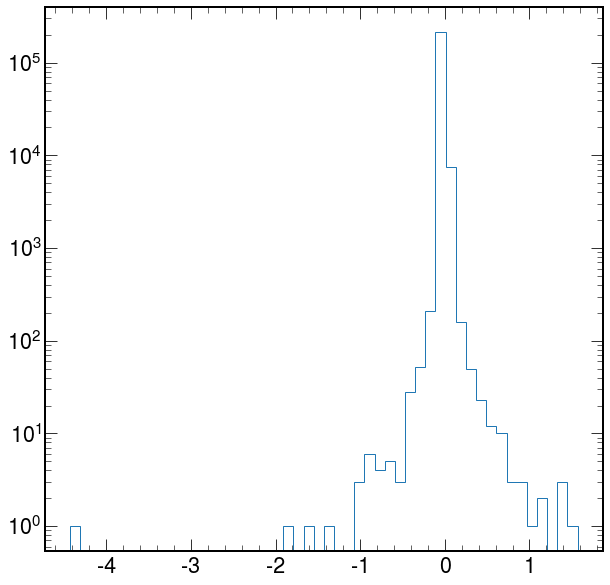

In [107]:
_ = plt.hist(results['diff'].values, bins =50, histtype='step') 
plt.yscale('log')

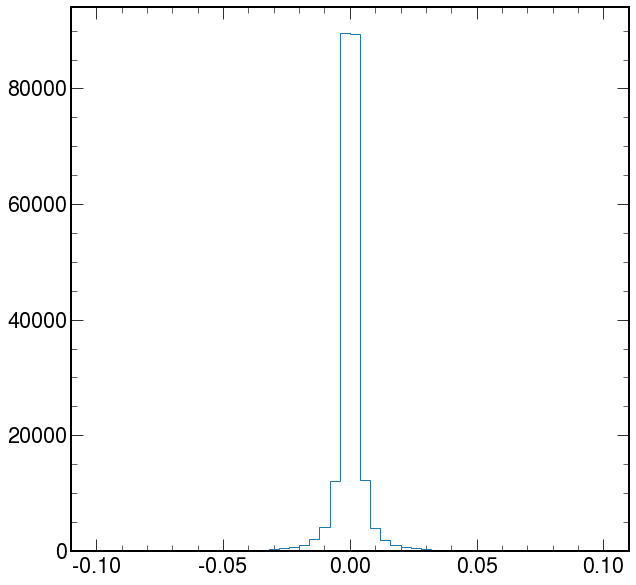

In [106]:
_ = plt.hist(results['diff'].values, bins =50, histtype='step', range=(-0.1, 0.1))


In [83]:
z0_gen

entry
0         5.054894
1        -3.599295
2        -0.261687
3         2.803424
4        -1.400962
            ...   
222971   -0.698044
222972    0.516307
222973   -3.605887
222974   -4.491471
222975    1.365055
Name: tp_z0, Length: 222941, dtype: float32

ValueError: Length of values (222941) does not match length of index (222976)

In [85]:
gen

,,pv_L1reco_z0,pv_L1reco_sum,pv_MC
entry,subentry,,,
0,0,5.026911,79.777252,5.055163
1,0,-2.021080,90.041313,-3.608661
2,0,-0.141508,202.421341,-0.261453
3,0,2.744174,303.983124,2.803285
4,0,-1.279072,218.012939,-1.400667
...,...,...,...,...
222971,0,-0.672085,223.375061,-0.698029
222972,0,0.576154,121.422821,0.520282
222973,0,-3.504717,167.360825,-3.604865


In [22]:
trk = dfs[0]
tp = dfs[1]

In [23]:
tp.head()

tp_pt    tp_eta    tp_phi     tp_d0     tp_z0  tp_eventid
entry subentry                                                               
0     0          2.139707 -0.042819 -2.249776 -0.000188  5.055195           0
      1          3.263992 -0.297909 -2.668668  0.000119  5.055390           0
      2          2.888089  1.501334 -0.832884 -0.000731  5.055292           0
      3          3.574382 -0.151156  2.117383  0.000738  5.055151           0
      4         18.492512 -0.111532 -1.921995 -0.000417  5.055228           0

In [24]:
from pv_utils import truth_pv_z0

In [25]:
z0_gen = truth_pv_z0(tp)

In [26]:
z0_gen

entry
0         5.054894
1        -3.599295
2        -0.261687
3         2.803424
4        -1.400962
            ...   
222971   -0.698044
222972    0.516307
222973   -3.605887
222974   -4.491471
222975    1.365055
Name: tp_z0, Length: 222941, dtype: float32

Text(1, 0, '$z_{gen}$')

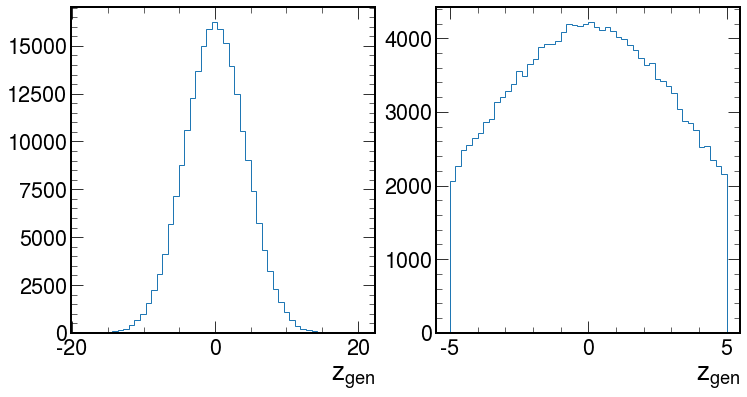

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
_ = ax[0].hist(z0_gen, bins = 50, histtype='step')
_ = ax[1].hist(z0_gen, bins =50, histtype='step', range=(-5, 5))
ax[0].set_xlabel(r'$z_{gen}$')
ax[1].set_xlabel(r'$z_{gen}$')

In [41]:
from pv_utils import run_fast_histo, run_dbscan, primary_vertex_efficiency

In [35]:
help(run_fast_histo)

Help on function run_fast_histo in module pv_utils:

run_fast_histo(df: pandas.core.frame.DataFrame, bin_edges: <built-in function array>, z0_column: str = 'trk_z0', pt_column: str = 'trk_pt') -> pandas.core.frame.DataFrame
    Runs fast histo on all of the available events



In [37]:
bin_edges = np.arange(-15, 15+0.25, 0.25)

In [38]:
fast_histo = run_fast_histo(trk, bin_edges, z0_column='trk_z0', pt_column='trk_pt')

/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


In [42]:
help(primary_vertex_efficiency)

Help on function primary_vertex_efficiency in module pv_utils:

primary_vertex_efficiency(z0_gen: <built-in function array>, z0_reco: <built-in function array>, delta: float = 0.1) -> float
    Returns the primary vertex reconstruction efficiency, which is dependent on the resolution (delta)



In [43]:
primary_vertex_efficiency(z0_gen, z0_reco=fast_histo)

63.052107956813686

In [108]:
primary_vertex_efficiency(pv_MC, z0_reco=fast_histo)

63.28483783008036

In [44]:
from pv_utils import plot_pv_efficiency_z0

In [47]:
bin_edges_plot = np.arange(-15, 15+1, 1)

In [46]:
help(plot_pv_efficiency_z0)

Help on function plot_pv_efficiency_z0 in module pv_utils:

plot_pv_efficiency_z0(z0_gen: <built-in function array>, z0_reco: <built-in function array>, bin_edges: <built-in function array>, delta: float = 0.1) -> dict



In [111]:
pv_eff

,x,error_x,eff,ci_low,ci_upp,lower_error,upper_error
0,-14.5,0.5,0.644068,0.508684,0.764455,0.135384,0.120388
1,-13.5,0.5,0.661654,0.574558,0.741373,0.087097,0.079719
2,-12.5,0.5,0.625000,0.565425,0.681899,0.059575,0.056899
3,-11.5,0.5,0.604377,0.563773,0.643938,0.040604,0.039561
4,-10.5,0.5,0.648352,0.617870,0.677957,0.030481,0.029606
5,-9.5,0.5,0.642398,0.620185,0.664163,0.022213,0.021765
6,-8.5,0.5,0.646106,0.628396,0.663521,0.017710,0.017415
7,-7.5,0.5,0.614679,0.600227,0.628980,0.014452,0.014302
8,-6.5,0.5,0.648865,0.637219,0.660380,0.011646,0.011515
9,-5.5,0.5,0.633534,0.623552,0.643431,0.009982,0.009897


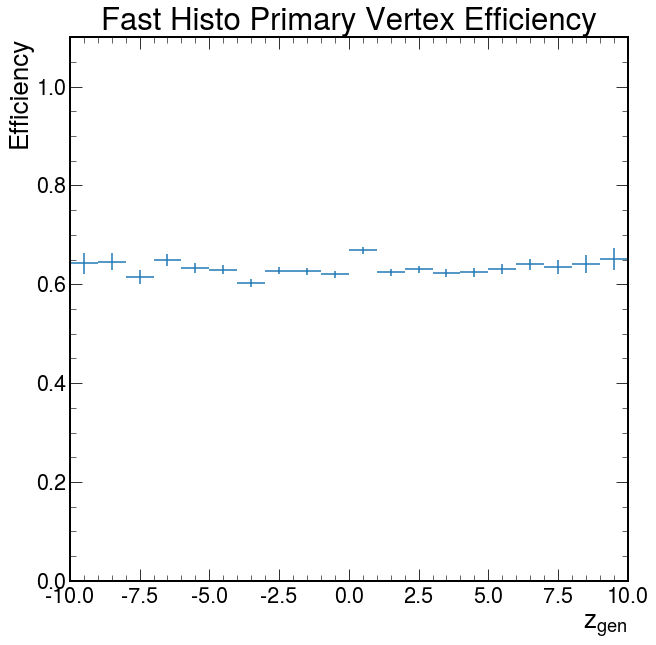

In [112]:
pv_eff = plot_pv_efficiency_z0(z0_gen, z0_reco=fast_histo, bin_edges=bin_edges_plot, delta=0.1)
plt.title('Fast Histo Primary Vertex Efficiency')
plt.savefig('fast_histo_pv_eff.pdf', dpi =500, bbox_inches='tight')

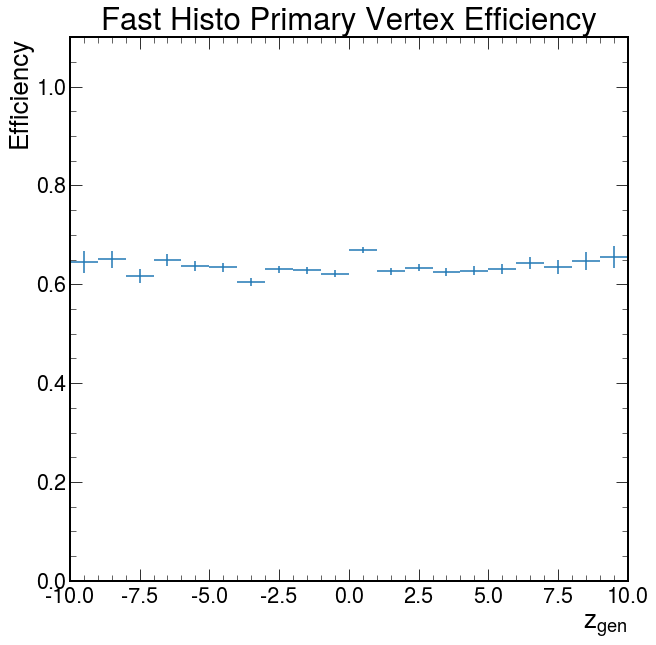

In [113]:
pv_MC_eff = plot_pv_efficiency_z0(pv_MC, z0_reco=fast_histo, bin_edges=bin_edges_plot, delta=0.1)
plt.title('Fast Histo Primary Vertex Efficiency')
plt.savefig('fast_histo_pv_MC_eff.pdf', dpi =500, bbox_inches='tight')

Text(1, 59.0, '$z_{gen}$')

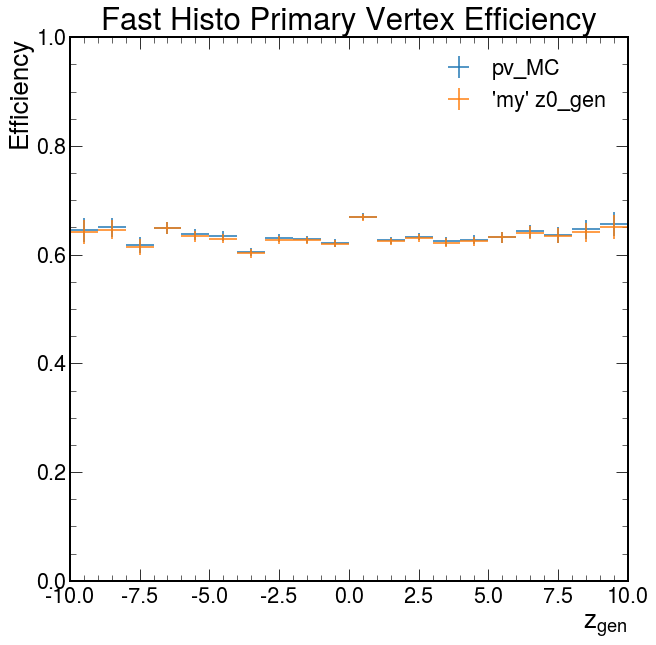

In [121]:
plt.errorbar(
    pv_MC_eff['x'],
    pv_MC_eff['eff'],
    xerr=pv_MC_eff['error_x'],
    yerr=[pv_MC_eff["lower_error"].values, pv_MC_eff["upper_error"].values],
    ls="none",
    label = "pv_MC"
)
plt.errorbar(
    pv_eff['x'],
    pv_eff['eff'],
    xerr=pv_eff['error_x'],
    yerr=[pv_eff["lower_error"].values, pv_eff["upper_error"].values],
    ls="none",
    label = "'my' z0_gen"
)
plt.xlim(-10, 10)
plt.ylim(0, 1.0)
plt.legend()
plt.title('Fast Histo Primary Vertex Efficiency')
plt.savefig('fast_histo_pv_pv_MC_comparison_eff.pdf', dpi =500, bbox_inches='tight')
plt.ylabel("Efficiency")
plt.xlabel(r"$z_{gen}$")

# Fast Histo Resolution Profile

In [189]:
from pv_utils import plot_pv_resolution_z0

In [170]:
fast_histo

entry
0         4.930890
1        -3.606179
2        -0.169271
3         2.815755
4        -1.365234
            ...   
222971   -0.812322
222972    0.344238
222973   -3.597656
222974   -4.376698
222975    0.911865
Length: 222976, dtype: float64

In [171]:
bins

NameError: name 'bins' is not defined

In [174]:
bin_edges_resolution = np.arange(-15, 15+1, 1)

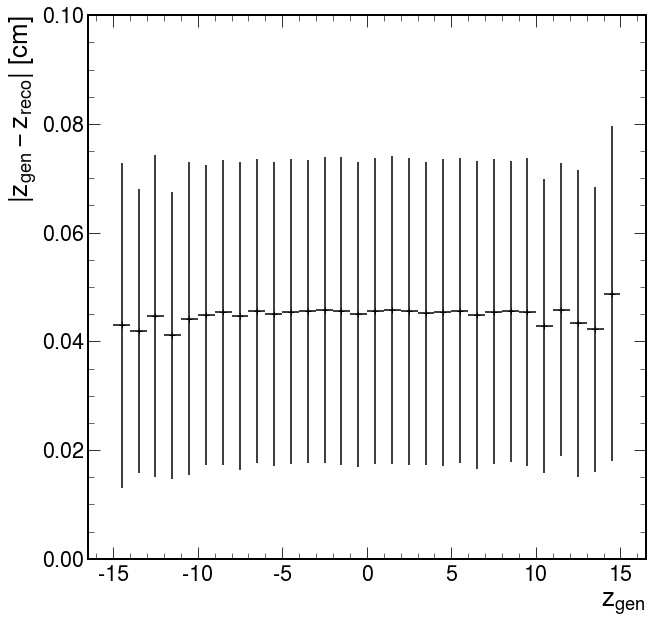

In [175]:
r_res = plot_pv_resolution_z0(z0_gen=z0_gen, z0_reco=fast_histo, bins=bin_edges_resolution)

# DBSCAN Test

In [176]:
dbscan = run_dbscan(trk)

In [177]:
dbscan

,dbscan_labels,z0,pt
entry,,,
0,17.0,4.980469,84.025032
1,16.0,-3.603516,104.907082
2,39.0,-0.175781,226.240372
3,28.0,2.753906,301.090637
4,67.0,-1.289062,270.321960
...,...,...,...
222971,46.0,-0.703125,256.535797
222972,26.0,-1.552734,98.283119
222973,29.0,-3.574219,174.343292


In [180]:
dbscan.shape

(222976, 3)

In [181]:
z0_gen.shape

(222941,)

In [182]:
pv_MC.shape

(222976,)

In [183]:
pv_MC

entry
0         5.055163
1        -3.608661
2        -0.261453
3         2.803285
4        -1.400667
            ...   
222971   -0.698029
222972    0.520282
222973   -3.604865
222974   -4.483971
222975    1.365169
Name: pv_MC, Length: 222976, dtype: float32

Text(0.5, 1.0, 'DBSCAN Primary Vertex Efficiency')

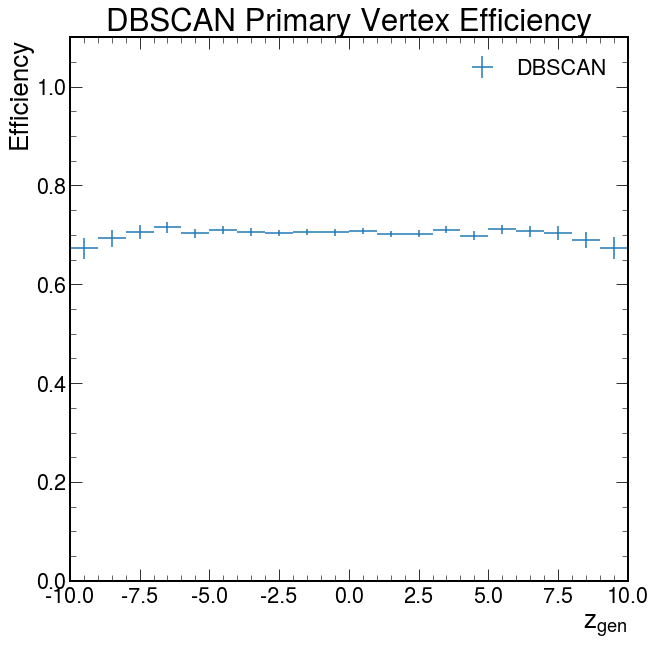

In [192]:
dbscan_eff = plot_pv_efficiency_z0(
    
    pv_MC,
    z0_reco=dbscan["z0"].values,
    bin_edges=bin_edges_plot,
    delta=0.1,
    label="DBSCAN",
)

plt.title("DBSCAN Primary Vertex Efficiency")
# plt.savefig('DBSCAN_pv_eff.pdf', dpi =500, bbox_inches='tight')

Text(0, 1, 'Efficiency')

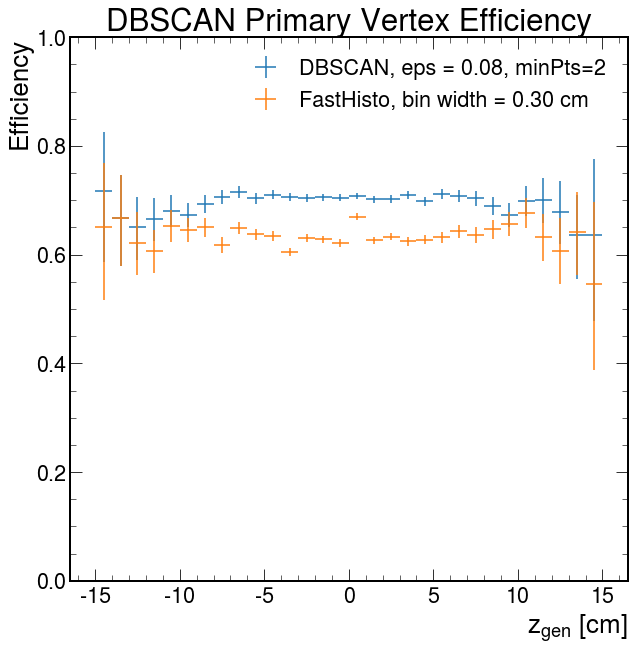

In [237]:
plt.errorbar(
    dbscan_eff["x"],
    dbscan_eff["eff"],
    xerr=dbscan_eff["error_x"],
    yerr=[dbscan_eff["lower_error"].values, dbscan_eff["upper_error"].values],
    ls="none",
    label="DBSCAN, eps = 0.08, minPts=2",
)


plt.errorbar(
    pv_MC_eff["x"],
    pv_MC_eff["eff"],
    xerr=pv_MC_eff["error_x"],
    yerr=[pv_MC_eff["lower_error"].values, pv_MC_eff["upper_error"].values],
    ls="none",
    label="FastHisto, bin width = 0.30 cm",
)

plt.title("DBSCAN Primary Vertex Efficiency")
plt.ylim(0, 1)
plt.legend()
# plt.savefig('DBSCAN_pv_eff.pdf', dpi =500, bbox_inches='tight')
plt.xlabel(r'$z_{gen}$ [cm]')
plt.ylabel('Efficiency')

# Resolution

In [197]:
res = pd.DataFrame({"z0_gen":pv_MC})

In [199]:
res[
    'fh'
] = fast_histo

In [201]:
res['db'] = dbscan['z0']

In [203]:
res['res_fh'] = res['z0_gen'] - res['fh']
res['res_db'] = res['z0_gen'] - res['db']

In [213]:
res['abs_fh'] = np.abs(res['z0_gen'] - res['fh'])
res['abs_db'] = np.abs(res['z0_gen'] - res['db'])

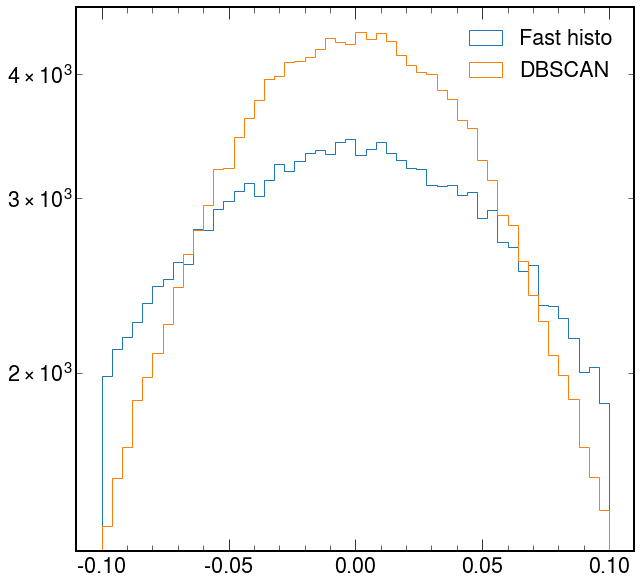

In [214]:
h, be, _ = plt.hist(res.loc[np.abs(res['res_fh']) < 0.1, 'res_fh'], bins = 50,  histtype='step', label = 'Fast histo')
_ = plt.hist(res.loc[np.abs(res['res_db']) < 0.1, 'res_db'], bins=be, histtype='step', label = 'DBSCAN')
plt.legend()
plt.yscale('log')

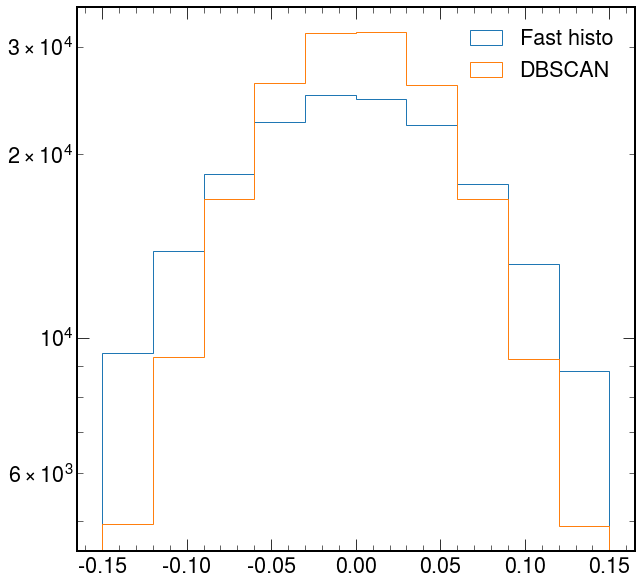

In [208]:
plt.hist(res['res_fh'], histtype='step', label = 'Fast histo', range = (-0.15, 0.15))
plt.hist(res['res_db'], histtype='step', label = 'DBSCAN', range = (-0.15, 0.15))
plt.legend()
plt.yscale('log')

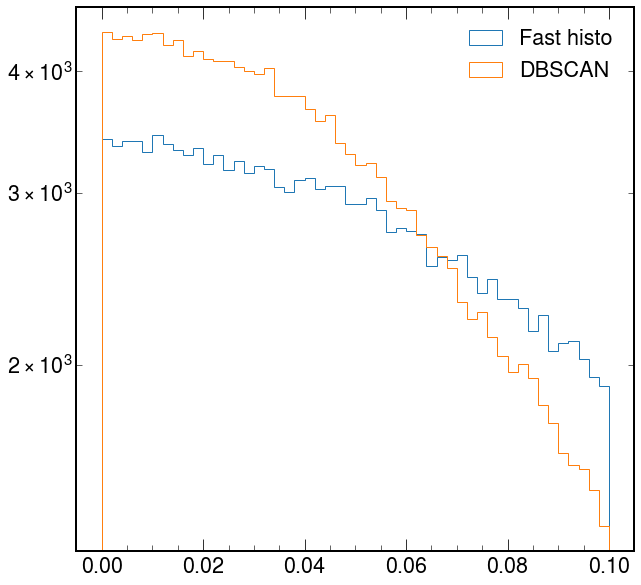

In [239]:
h, be, _ = plt.hist(res.loc[res['abs_fh'] < 0.1, 'abs_fh'], bins = 50,  histtype='step', label = 'Fast histo')
_ = plt.hist(res.loc[res['abs_db'] < 0.1, 'abs_db'], bins=be, histtype='step', label = 'DBSCAN')
plt.legend()
plt.yscale('log')

In [221]:
fast_histo.isna().value_counts()

False    222905
True         71
dtype: int64

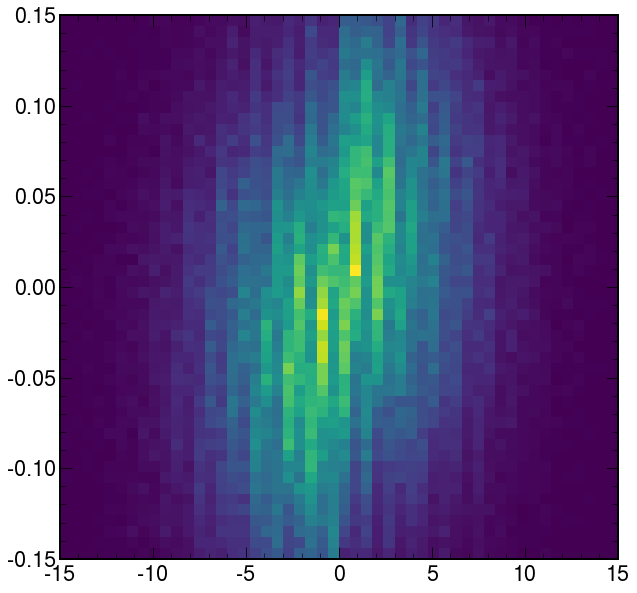

In [226]:
_ = plt.hist2d(res['z0_gen'],res['res_fh'], bins = 50, range=((-15, 15), (-0.15, 0.15)))

Text(0.5, 1.0, 'Resolution with DBSCAN, eps =0.08, minPts=2')

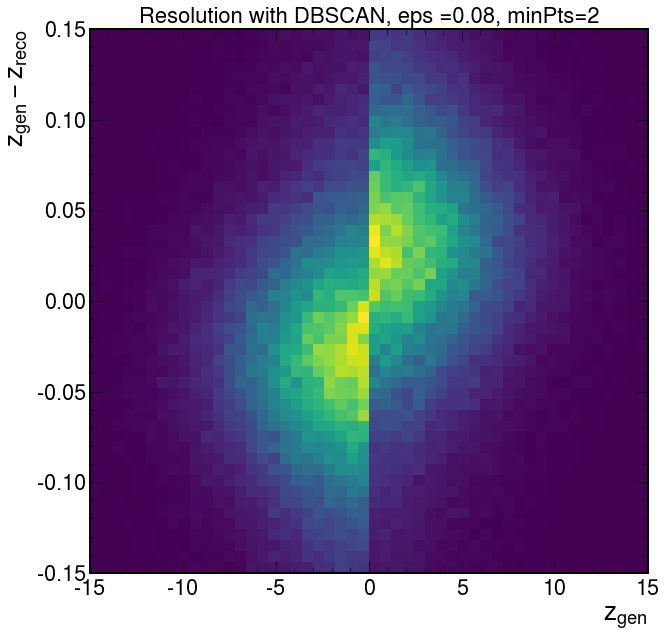

In [234]:
_ = plt.hist2d(res['z0_gen'],res['res_db'], bins = 50, range=((-15, 15), (-0.15, 0.15)))
plt.xlabel(r'$z_{gen}$')
plt.ylabel(r'$z_{gen} - z_{reco}$')
plt.title('Resolution with DBSCAN, eps =0.08, minPts=2', fontsize= 22)